In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads=pd.read_csv('recent-grads.csv')
print(recent_grads.head(5))
print(recent_grads.tail(5))
print(recent_grads.describe())

   Rank  Major_code                                      Major  Total    Men  \
0     1        2419                      PETROLEUM ENGINEERING   2339   2057   
1     2        2416             MINING AND MINERAL ENGINEERING    756    679   
2     3        2415                  METALLURGICAL ENGINEERING    856    725   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258   1123   
4     5        2405                       CHEMICAL ENGINEERING  32260  21239   

   Women Major_category  ShareWomen  Sample_size  Employed      ...        \
0    282    Engineering    0.120564           36      1976      ...         
1     77    Engineering    0.101852            7       640      ...         
2    131    Engineering    0.153037            3       648      ...         
3    135    Engineering    0.107313           16       758      ...         
4  11021    Engineering    0.341631          289     25694      ...         

   Part_time  Full_time_year_round  Unemployed  Unemploy

In [3]:
rows1=recent_grads.shape[0]

newgrad=recent_grads.dropna() #Dropping the NaN values
rows2=newgrad.shape[0]

print(rows1,',',rows2)

173 , 172


(array([  8.,  14.,  27.,  48.,  34.,  27.,   9.,   1.,   3.,   1.]),
 array([ 0.        ,  0.01772264,  0.03544528,  0.05316792,  0.07089056,
         0.0886132 ,  0.10633584,  0.12405848,  0.14178113,  0.15950377,
         0.17722641]),
 <a list of 10 Patch objects>)

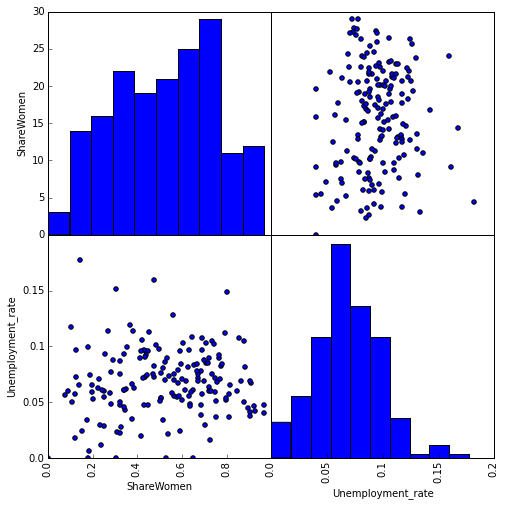

In [4]:
fig=plt.figure(figsize=(8,8))
fig.subplots_adjust(wspace=0,hspace=0) #will remove space inbetween the subplots

ax1=fig.add_subplot(2,2,1)
xaxis1=ax1.get_xaxis()
xaxis1.set_visible(False) #removes xaxis ticks
ax1.get_yaxis().tick_left() #sets the y axis ticks to the left
ax1.set_ylabel('ShareWomen') #set y label
ax1.set_ylim(0,30) #changes x limits
ax1.set_yticklabels([0, 5, 10, 15, 20, 25, 30])

ax2=fig.add_subplot(2,2,2)
xaxis2=ax2.get_xaxis()
xaxis2.set_visible(False)
yaxis2=ax2.get_yaxis()
yaxis2.set_visible(False)
ax2.set_ylim(0.0,1.0)


ax3=fig.add_subplot(2,2,3)
ax3.set_xlabel('ShareWomen')
ax3.set_ylabel('Unemployment_rate')
ax3.get_xaxis().tick_bottom()
ax3.get_yaxis().tick_left()
ax3.set_xlim(0.0,1.0)
ax3.set_ylim(0.0,0.20)
ax3.set_yticklabels([0.00, 0.05, 0.10, 0.15])
ax3.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8], rotation=90)

ax4=fig.add_subplot(2,2,4)
ax4.set_xlabel('Unemployment_rate')
ax4.get_xaxis().tick_bottom()
ax4.get_yaxis().set_visible(False)
ax4.set_xlim(0.0,0.20)
ax4.set_xticklabels([0.00, 0.05, 0.10, 0.15, 0.20], rotation=90)

ax1.hist(newgrad['ShareWomen'])
ax2.scatter(newgrad['Unemployment_rate'], newgrad['ShareWomen'])
ax3.scatter(newgrad['ShareWomen'], newgrad['Unemployment_rate'])
ax4.hist(newgrad['Unemployment_rate'])

0     0.879436
1     0.898148
2     0.846963
3     0.892687
4     0.658369
5     0.855033
6     0.558644
7     0.464286
8     0.880441
9     0.803550
10    0.800587
11    0.860207
12    0.562153
13    0.689180
14    0.816015
...
158    0.616281
159    0.280026
160    0.415224
161    0.271505
162    0.292864
163    0.032002
164    0.031046
165    0.309889
166    0.333881
167    0.370495
168    0.362707
169    0.182901
170    0.200141
171    0.201254
172    0.122040
Name: ShareMen, Length: 172, dtype: float64


/opt/dsserver/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


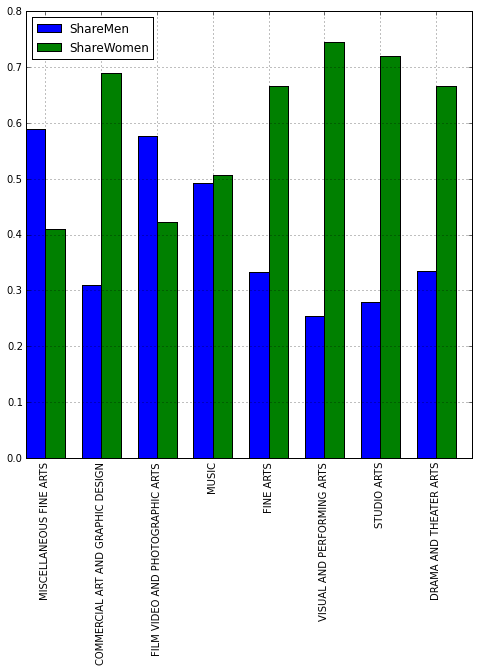

In [6]:
import numpy as np

newgrad['ShareMen']=newgrad['Men']/newgrad['Total']
print(newgrad['ShareMen'])

arts=newgrad[newgrad['Major_category']=='Arts']

fig=plt.figure(figsize=(8,8))

ax1=fig.add_subplot(1,1,1)

locs=np.arange(8)

bar_1=ax1.bar(locs,arts['ShareMen'].tolist(),width=0.35)
ax1.set_xticklabels(arts['Major'].tolist(),rotation=90)


#####Assigning the ShareWomen Bars

offset_locs=locs+0.35

bar_2=ax1.bar(offset_locs,arts['ShareWomen'].tolist(),width=0.35,color='green')
ax1.set_xticks(offset_locs)

plt.legend((bar_1, bar_2), ("ShareMen", "ShareWomen"), loc="upper left")
plt.grid()